In [3]:
#percentage that the student got in the exam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('C:\\Users\\DELL\\Desktop\\student.csv')

In [56]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [58]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


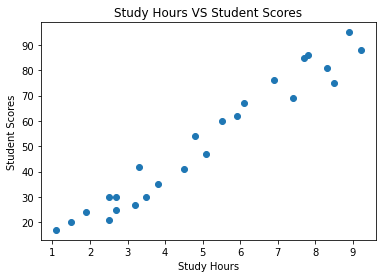

In [6]:
plt.scatter (x = data.Hours, y = data.Scores)
plt.xlabel("Study Hours")
plt.ylabel ("Student Scores")
plt.title ('Study Hours VS Student Scores')
plt.show ()

In [7]:
#cleaning the data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [61]:
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [62]:
data2 = data.fillna(data.mean())

In [63]:
data2.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [64]:
data2.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [65]:
#splitting the dataset into the values
x = data2.drop("Scores", axis="columns")
y = data2.drop ("Hours", axis="columns")
print("shape of x", x.shape)
print("shape of y", y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 51)

In [67]:
print("shape of X_train", X_train)
print("Shape of Y_train", Y_train)
print("Shape of X_test", X_test)
print("shape of Y_test", Y_test)

shape of X_train     Hours
1     5.1
19    7.4
2     3.2
11    5.9
6     9.2
3     8.5
13    3.3
4     3.5
15    8.9
17    1.9
12    4.5
18    6.1
14    1.1
21    4.8
22    3.8
16    2.5
24    7.8
9     2.7
0     2.5
5     1.5
Shape of Y_train     Scores
1       47
19      69
2       27
11      62
6       88
3       75
13      42
4       30
15      95
17      24
12      41
18      67
14      17
21      54
22      35
16      30
24      86
9       25
0       21
5       20
Shape of X_test     Hours
7     5.5
10    7.7
23    6.9
8     8.3
20    2.7
shape of Y_test     Scores
7       60
10      85
23      76
8       81
20      30


# select a model and train the model

In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [70]:
lr.fit(X_train, Y_train)

LinearRegression()

In [71]:
lr.coef_

array([[9.56433743]])

In [72]:
m = 3.93
c = 50.44
y = m * 12 + c
y

97.6

In [73]:
lr.predict([[4]])[0][0].round(2)

40.96

In [74]:
y_pred = lr.predict(X_test)
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [76]:
pd.DataFrame(np.c_[X_test, Y_test, y_pred], columns=["study_hours", "studentmarks_original", "student_marks_predicited"])

,study_hours,studentmarks_original,student_marks_predicited
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


In [77]:
lr.score(X_test, Y_test)

0.9238518102278777

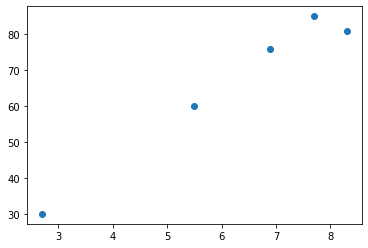

In [78]:
plt.scatter(X_test, Y_test)

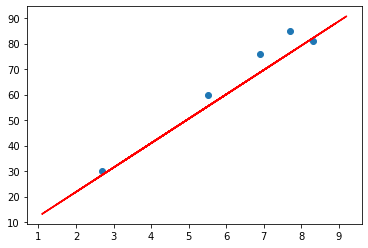

In [81]:
plt.scatter(X_test, Y_test)
plt.plot(X_train, lr.predict(X_train), color="red")

In [82]:
import joblib
joblib.dump(lr, "student_Marks_Predictor.pkl")

['student_Marks_Predictor.pkl']

In [83]:
model = joblib.load("student_Marks_Predictor.pkl")

In [84]:
model.predict([[5]])

array([[50.52365786]])